FIFA_data_pre2.csv EXIST.
決定係数(train):0.993
決定係数(test):0.993
RMSE :0.565 


<AxesSubplot:xlabel='Predictions', ylabel='Overall'>

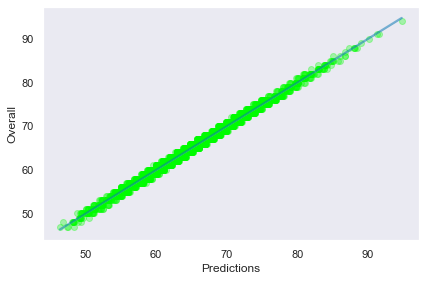

In [12]:
#AI-TECHGYM-2-11-A-1
#特徴量エンジニアリング

#インポート
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# 実行場所
import os
os.chdir(r"C:\Users\tsuchida\Documents\techgym_セミナー\TortoiseGit_resorce\techgym_ai\Chapter_2\Answer_sheet\AI_Chapter2_saved_files")

#ファイルがなければ前の問題を実施する
title = "FIFA_data_pre2.csv"
if not os.path.exists(title):
    print("Run Previous problem.")
else :
    print(title + " EXIST.")
    df=pd.read_csv('./FIFA_data_pre2.csv')

#スタイル指定
plt.style.use('fivethirtyeight')
sns.set(style = "dark", palette = "colorblind", color_codes = True)

#不要な列を削除する
drop_cols = df.columns[28:54]
df = df.drop(drop_cols, axis = 1)
df = df.drop(['Unnamed: 0','Unnamed: 0.1','ID','Jersey Number','Joined','Loaned From',
              'Body Type', 'Release Clause','Contract Valid Until','LS','ST',
              'Value','Name','Club'], axis = 1)

df[df['Real Face'] == 'Yes']
df['Real Face'] == 'Yes'


ls_GK = ['GK']
ls_DF = ['RB','LB','CB','LCB','RCB','RWB','LWB']
ls_DM = ['LDM', 'CDM', 'RDM']
ls_MF = ['LM', 'LCM', 'CM', 'RCM', 'RM']
ls_AM = ['LAM', 'CAM', 'RAM', 'LW', 'RW']
ls_ST = ['RS', 'ST', 'LS', 'CF', 'LF', 'RF']

# ls_GK = ['GK',['GK']]
# ls_DF = ['DF',['RB','LB','CB','LCB','RCB','RWB','LWB']]
# ls_DM = ['DM',['LDM', 'CDM', 'RDM']]
# ls_MF = ['LM', 'LCM', 'CM', 'RCM', 'RM']
# ls_AM = ['LAM', 'CAM', 'RAM', 'LW', 'RW']
# ls_ST = ['RS', 'ST', 'LS', 'CF', 'LF', 'RF']
# dict_position = {
#     'GK' : 'GK',
#     'RB' : 'DF', 'LB' : 'DF', 'LB' : 'DF',
# }
# def make_dict(ls):
#     for element in ls:
#         dict_position

def check_position(x):
    # return dict_positon[x] ・・・ 辞書型をキーで指定する書き方もあったはず
    if x in ls_GK:
        return 'GK'
    elif x in ls_DF:
        return 'DF'
    elif x in ls_DM:
        return 'DM'
    elif x in ls_MF:
        return 'MF'
    elif x in ls_AM:
        return 'AM'
    elif x in ls_ST:
        return 'ST'
    else:
        print('!例外! ' + x + '：該当ポジションが見つかりません')

df['Category_Real Face'] = df['Real Face'].apply(
    lambda x: 0 if x == 'No' else 1
    )
df['Category_Preferred Foot'] = df['Preferred Foot'].apply(
    lambda x: 0 if x == 'Left' else 1
    )
df['Simple_Position'] = df['Position'].apply(
    lambda x: check_position(x)
    )

Football_players_count = df['Nationality'].value_counts()
df['Category_Nationality'] = df['Nationality'].apply(
    lambda x: 0 if Football_players_count[x] <= 250 else 1
    )
df['Work Rate1'] = df['Work Rate'].apply(
    lambda x: x.split('/')[0]
    )
df['Work Rate2'] = df['Work Rate'].apply(
    lambda x: x.split('/')[1]
    )

df['feet'] = df['Height'].apply(
    lambda x: float(x.split('\'')[0])
    )
df['inch'] = df['Height'].apply(
    lambda x: float(x.split('\'')[1])
    )
df['Height_cm'] = df['feet'] * 30.48 + df['inch'] * 2.54
# display(df.head())

obj_list = ['Real Face', 'Preferred Foot', 'Position', 'Nationality', 'Work Rate', 'Height', 'feet', 'inch']
df.drop(obj_list, axis=1, inplace=True)
# display(df[obj_list])
# display(df)

#カテゴリ変数となる項目名が一列目に縦に並ぶデータフレームに対して、ワンホットエンコーディングを実行し、カテゴリ変数に対して0／1が入った行列を作る
df_c = pd.get_dummies(df)
# Category_parameters = ['Simple_Position', 'Work Rate1', 'Work Rate2']
# df_c = pd.get_dummies(df[Category_parameters])
# df = pd.concat([df, df_c], axis=1)
# display(df_c)
# df.drop(Category_parameters, axis=1, inplace=True)
# display(df_c)

#作成した特徴量
df_p = df_c

target = df_p['Overall']
df_t = df_p.drop(['Overall'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(df_t, target, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

#結果の表示
print('決定係数(train):{:.3f}'.format(model.score(X_train,y_train)))
print('決定係数(test):{:.3f}'.format(model.score(X_test,y_test)))
print('RMSE :{:.3f} '.format(np.sqrt(mean_squared_error(y_test, predictions))))

df_test = pd.DataFrame({'Overall':y_test,'Predictions':predictions})
# display(df_test)
sns.regplot(x="Predictions", y="Overall", data=df_test, scatter_kws={'alpha':0.3,'color':'lime'}, line_kws={'alpha':0.5, 'color':'b'})

In [3]:
type(nat_counts)

pandas.core.series.Series

In [4]:
nat_counts

England                 1662
Germany                 1198
Spain                   1072
Argentina                937
France                   914
                        ... 
New Caledonia              1
Fiji                       1
São Tomé & Príncipe        1
United Arab Emirates       1
Botswana                   1
Name: Nationality, Length: 164, dtype: int64

In [44]:
#カテゴリ変数となる項目名が一列目に縦に並ぶデータフレームに対して、ワンホットエンコーディングを実行し、カテゴリ変数に対して0／1が入った行列を作る
df_c = pd.get_dummies(df['Simple_Position'])
df_c

,AM,DF,DM,GK,MF,ST
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,1,0,0,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
18202,0,0,0,0,1,0
18203,0,0,0,0,0,1
18204,0,0,0,0,0,1
18205,1,0,0,0,0,0


In [45]:
#AI-TECHGYM-2-6-A-1
#特徴量エンジニアリング

#インポート
import pandas as pd

#読み込みデータ
pg_data = {'0':['Python'],'1':['Ruby'],'2':['PHP'],'3':['Java'],'4':['JavaScript']} #pg_data:項目名の辞書型
df_row = pd.DataFrame(pg_data)                                                      #df_row:項目名が一行目に横に並ぶデータフレーム
df = df_row.T                                                                       #df:項目名が一列目に縦に並ぶデータフレーム
#display(df)

#one hot encoding
df_c = pd.get_dummies(df)                                                           #カテゴリ変数となる項目名が一列目に縦に並ぶデータフレームに対して、ワンホットエンコーディングを実行し、カテゴリ変数に対して0／1が入った行列を作る
#出力されるデータフレームの列名はオプションを指定しなければデフォルトで、<元のデータフレームの列名>_<カテゴリ変数名>となる
#get_dummiesのオプション・・・prefix, prefix_sep, columns(https://note.nkmk.me/python-pandas-get-dummies/)

#表示用並び替え
df_d = df_c.iloc[:,[3,4,2,0,1]]                                                     #ワンホットエンコーディングしたデータフレームの列順を、1が対角項に来るよう並び変える
display(df_d)                                                                       #1が対角項に並んだ、カテゴリ変数の行列を表示する

#columnを設定して、値を取得
new_df = pd.DataFrame(columns=["row", "vector"])                                    #列名だけの空のデータフレーム。rowはカテゴリ変数、vectorはカテゴリ変数の行列の縦ベクトル
values = df[0].values                                                               #df(項目名が一列目に縦に並ぶデータフレーム)の1列目をシリーズ型にしたもの

#one hot encoding
for i, row in enumerate(values):                                                    #項目名ひとつ毎につき１ループ。iはループ回数、rowは項目名
    vector    = [0] * len(values)                                                   #vector:ワンホットベクトルのベースとなる0ベクトル
    vector[i] = 1                                                                   #vector:ワンホットベクトルの1の場所を、他のループでつくるワンホットベクトルの1の場所と被らないよう、ループ回数iで指定する
    tmp_se    = pd.Series([row, vector], index=new_df.columns)                      #tmp_se:上述のrowとvectorを値としてシリーズ型にしたもの
    new_df    = new_df.append(tmp_se, ignore_index=True)                            #空のデータフレームnew_dfに、tmp_seのシリーズを横に連結（２列分追加）する

#表示
display(new_df)


,0_Python,0_Ruby,0_PHP,0_Java,0_JavaScript
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,0,1


,row,vector
0,Python,"[1, 0, 0, 0, 0]"
1,Ruby,"[0, 1, 0, 0, 0]"
2,PHP,"[0, 0, 1, 0, 0]"
3,Java,"[0, 0, 0, 1, 0]"
4,JavaScript,"[0, 0, 0, 0, 1]"


In [129]:
# データセットの読み込み
exercise = sns.load_dataset("exercise")
# print(exercise)
# print(exercise['Unnamed: 0'])
# print(exercise['kind'] == 'rest')
# print(exercise.loc[(exercise['kind'] == 'rest')])

# 疑問１　0の値の行が除外されないのはなぜでしょうか？
print(exercise.loc[exercise['Unnamed: 0']])

# 疑問２　奇数の値の行が抽出されるのはなぜでしょうか？
print(exercise.loc[(exercise['kind'] == 'rest') & exercise['Unnamed: 0']])

    Unnamed: 0  id     diet  pulse    time     kind
0            0   1  low fat     85   1 min     rest
1            1   1  low fat     85  15 min     rest
2            2   1  low fat     88  30 min     rest
3            3   2  low fat     90   1 min     rest
4            4   2  low fat     92  15 min     rest
..         ...  ..      ...    ...     ...      ...
85          85  29   no fat    135  15 min  running
86          86  29   no fat    130  30 min  running
87          87  30   no fat     99   1 min  running
88          88  30   no fat    111  15 min  running
89          89  30   no fat    150  30 min  running

[90 rows x 6 columns]
    Unnamed: 0  id     diet  pulse    time  kind
1            1   1  low fat     85  15 min  rest
3            3   2  low fat     90   1 min  rest
5            5   2  low fat     93  30 min  rest
7            7   3  low fat     97  15 min  rest
9            9   4  low fat     80   1 min  rest
11          11   4  low fat     83  30 min  rest
13        

In [75]:
print(exercise['Unnamed: 0'][2])
exercise['Unnamed: 0'][2] == True

2


False

In [118]:
exercise['Unnamed: 0']

0      0
1      1
2      2
3      3
4      4
      ..
85    85
86    86
87    87
88    88
89    89
Name: Unnamed: 0, Length: 90, dtype: int64

In [121]:
exercise.loc[(exercise['kind'] == 'rest') & exercise['Unnamed: 0']]

,Unnamed: 0,id,diet,pulse,time,kind
1,1,1,low fat,85,15 min,rest
3,3,2,low fat,90,1 min,rest
5,5,2,low fat,93,30 min,rest
7,7,3,low fat,97,15 min,rest
9,9,4,low fat,80,1 min,rest
11,11,4,low fat,83,30 min,rest
13,13,5,low fat,92,15 min,rest
15,15,6,no fat,83,1 min,rest
17,17,6,no fat,84,30 min,rest
19,19,7,no fat,88,15 min,rest


In [117]:
exercise['kind'] == 'rest'

0      True
1      True
2      True
3      True
4      True
      ...  
85    False
86    False
87    False
88    False
89    False
Name: kind, Length: 90, dtype: bool

In [73]:
a = ['False']
a.append('False')
a

['False', 'False']

In [74]:
exercise.loc[[False]*len(exercise)]

,Unnamed: 0,id,diet,pulse,time,kind


In [26]:
exercise.groupby('diet').count()

,Unnamed: 0,id,pulse,time,kind
diet,,,,,
no fat,45,45,45,45,45
low fat,45,45,45,45,45


In [36]:
df.groupby('Club').count().Overall.sort_values()

Club
Derry City            18
Sligo Rovers          19
Limerick FC           19
Bahia                 20
Botafogo              20
                    ... 
RC Celta              33
Borussia Dortmund     33
FC Barcelona          33
Atlético Madrid       33
No Club              241
Name: Overall, Length: 652, dtype: int64

In [39]:
df.groupby('Club').mean()

,Unnamed: 0,Unnamed: 0.1,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,...,GKReflexes,Release Clause,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
Club,,,,,,,,,,,,,,,,,,,,,
SSV Jahn Regensburg,9405.310345,9405.310345,219059.413793,25.655172,65.586207,69.310345,7.963793e+05,4241.379310,1540.689655,1.000000,...,16.206897,1.692103e+06,45.793103,52.551724,50.275862,50.241379,60.862069,64.034483,67.482759,44.620690
1. FC Heidenheim 1846,9278.428571,9278.428571,219734.142857,24.000000,65.750000,71.928571,9.817857e+05,4464.285714,1563.714286,1.000000,...,16.142857,1.628607e+06,45.107143,52.000000,50.142857,52.142857,63.500000,62.714286,68.928571,47.035714
1. FC Kaiserslautern,11495.692308,11495.692308,220848.230769,23.846154,63.384615,69.884615,6.228846e+05,1692.307692,1524.269231,1.000000,...,15.038462,9.908462e+05,43.538462,50.076923,49.000000,51.000000,61.884615,62.923077,66.615385,45.384615
1. FC Köln,5241.035714,5241.035714,208388.714286,24.321429,70.785714,76.571429,4.853929e+06,13285.714286,1671.678571,1.321429,...,17.964286,7.751643e+06,51.535714,56.321429,56.142857,56.857143,64.928571,64.821429,73.714286,48.607143
1. FC Magdeburg,9514.115385,9514.115385,226487.961538,24.692308,65.615385,70.346154,7.894231e+05,4884.615385,1532.692308,1.038462,...,17.230769,1.513000e+06,45.884615,50.653846,48.961538,50.346154,62.038462,65.461538,67.961538,43.192308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zagłębie Sosnowiec,13864.840000,13864.840000,219129.880000,26.240000,60.760000,64.640000,2.726000e+05,1080.000000,1494.840000,1.000000,...,16.520000,5.204400e+05,47.560000,47.640000,49.000000,50.240000,60.400000,63.360000,62.640000,40.960000
Çaykur Rizespor,8332.900000,8332.900000,211290.833333,25.433333,66.900000,71.666667,1.728000e+06,6433.333333,1624.400000,1.000000,...,17.566667,3.676433e+06,48.366667,54.633333,53.166667,54.666667,63.100000,64.266667,69.266667,48.600000
Örebro SK,13289.296296,13289.296296,224120.185185,24.037037,60.481481,66.518519,3.957407e+05,1481.481481,1454.592593,1.000000,...,15.666667,6.605926e+05,40.703704,47.629630,47.148148,46.555556,62.111111,63.962963,63.444444,39.962963


In [55]:
Clubs =  df.groupby('Club').count().index

In [81]:
for club in Clubs:
    #nameから取り出した要素がcusotmers内にあればTrueになります。
    if "Fortuna D" in club:
        result = True
        print(club)
        #該当する要素が見つかった時点でブレイクします。
        break
    else:
        result = False
result

Fortuna Düsseldorf


True

In [62]:
(Clubs)

Index([' SSV Jahn Regensburg', '1. FC Heidenheim 1846', '1. FC Kaiserslautern',
       '1. FC Köln', '1. FC Magdeburg', '1. FC Nürnberg', '1. FC Union Berlin',
       '1. FSV Mainz 05', 'AC Ajaccio', 'AC Horsens',
       ...
       'Wycombe Wanderers', 'Yeni Malatyaspor', 'Yeovil Town',
       'Yokohama F. Marinos', 'Zagłębie Lubin', 'Zagłębie Sosnowiec',
       'Çaykur Rizespor', 'Örebro SK', 'Östersunds FK', 'Śląsk Wrocław'],
      dtype='object', name='Club', length=652)

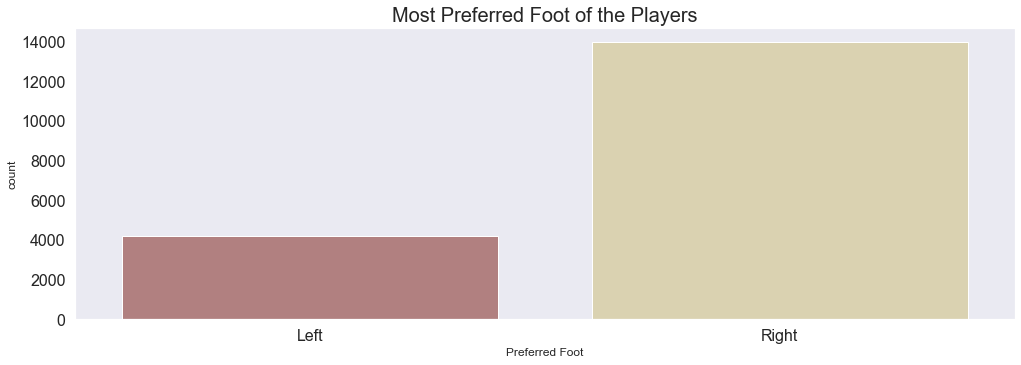

In [8]:
#利き足の数
plt.figure(figsize = (15, 5))
ax = sns.countplot(data=df, x='Preferred Foot', palette = 'pink')
ax.set_title('Most Preferred Foot of the Players', fontsize = 20)
plt.tick_params(labelsize = 16)
plt.show()

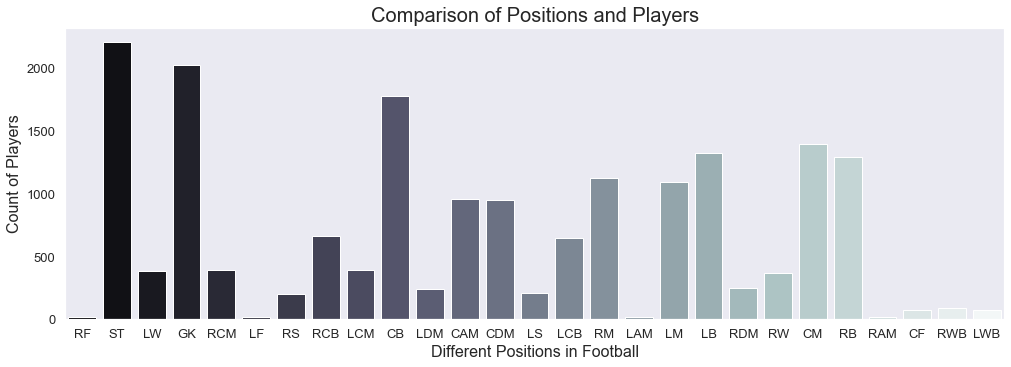

In [5]:
#ポジション分布
plt.figure(figsize = (15, 5))
ax = sns.countplot(data = df, x='Position', palette = 'bone')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.tick_params(labelsize = 13)
plt.show()

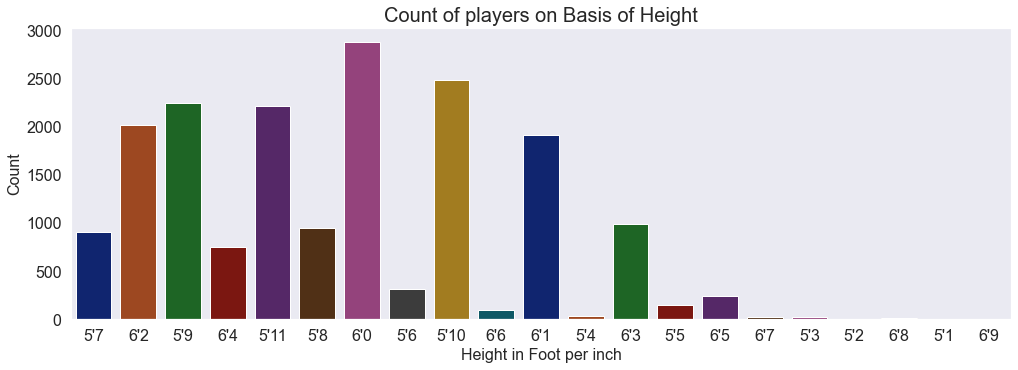

In [6]:
#背の高さ
plt.figure(figsize = (15, 5))
ax = sns.countplot(data = df, x = 'Height', palette = 'dark')
ax.set_xlabel(xlabel = 'Height in Foot per inch', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
ax.set_title(label = 'Count of players on Basis of Height', fontsize = 20)
plt.tick_params(labelsize = 16)
plt.show()

C:\Users\tsuchida\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


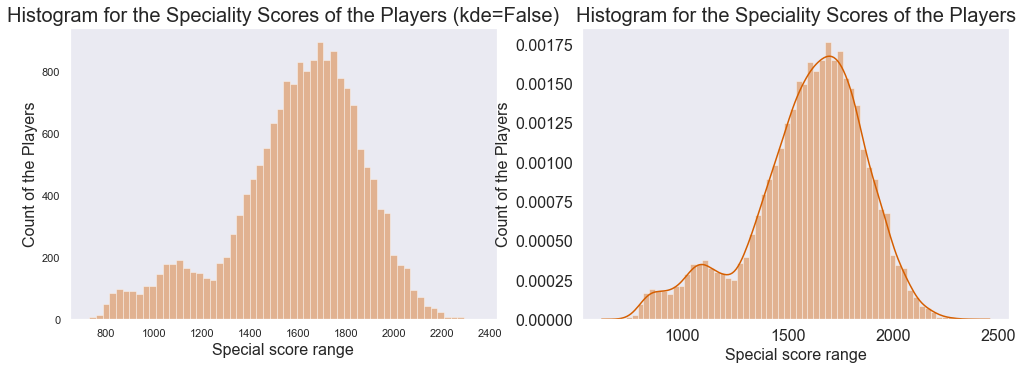

In [4]:
#特別なスコア
fig = plt.figure(figsize = (15, 5))
axes = fig.subplots(1,2)
sns.distplot(df['Special'], bins = 58, kde = False, color = 'r', ax=axes[0])
axes[0].set_xlabel(xlabel = 'Special score range', fontsize = 16)
axes[0].set_ylabel(ylabel = 'Count of the Players',fontsize = 16)
axes[0].set_title(label = 'Histogram for the Speciality Scores of the Players (kde=False)', fontsize = 20)
sns.distplot(df['Special'], bins = 58, color = 'r', ax=axes[1])
axes[1].set_xlabel(xlabel = 'Special score range', fontsize = 16)
axes[1].set_ylabel(ylabel = 'Count of the Players',fontsize = 16)
axes[1].set_title(label = 'Histogram for the Speciality Scores of the Players', fontsize = 20)
plt.tick_params(labelsize = 16)
plt.show()

C:\Users\tsuchida\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


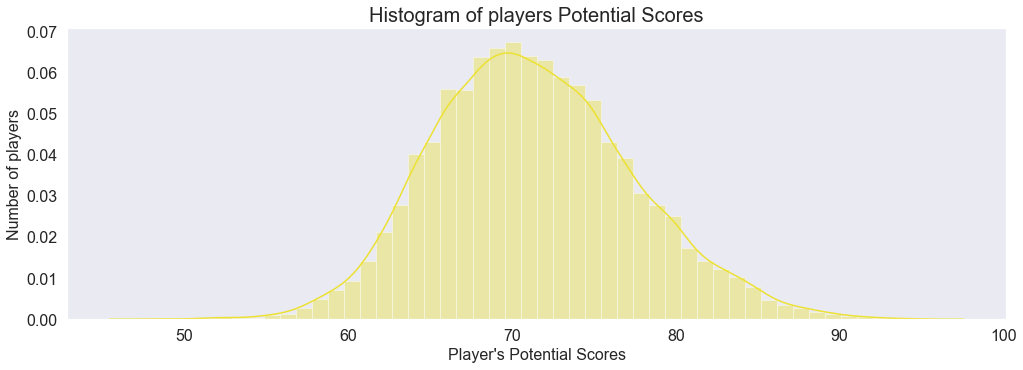

In [27]:
#ポテンシャル
plt.figure(figsize = (15, 5))
ax = sns.distplot(df['Potential'], bins = 48, kde = True, color = 'y')
ax.set_xlabel(xlabel = "Player\'s Potential Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players Potential Scores', fontsize = 20)
plt.tick_params(labelsize = 16)
plt.show()


C:\Users\tsuchida\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


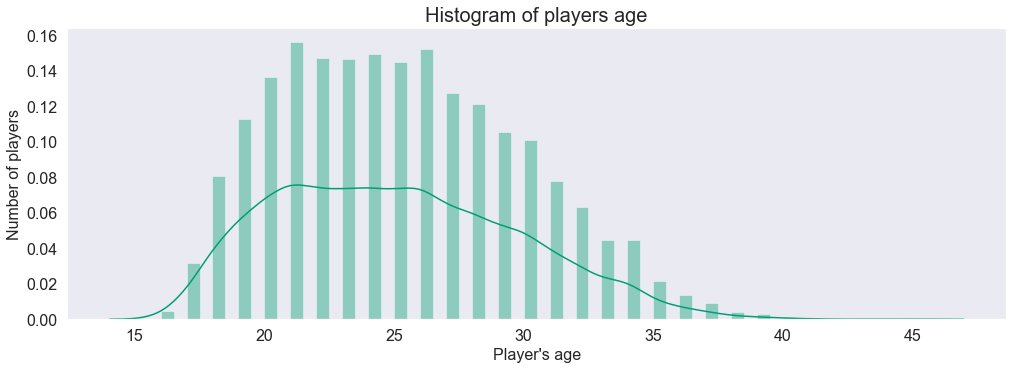

In [28]:
#年齢
plt.figure(figsize = (15, 5))
ax = sns.distplot(df['Age'], bins = 58, kde = True, color = 'g')
ax.set_xlabel(xlabel = "Player\'s age", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players age', fontsize = 20)
plt.tick_params(labelsize = 16)
plt.show()

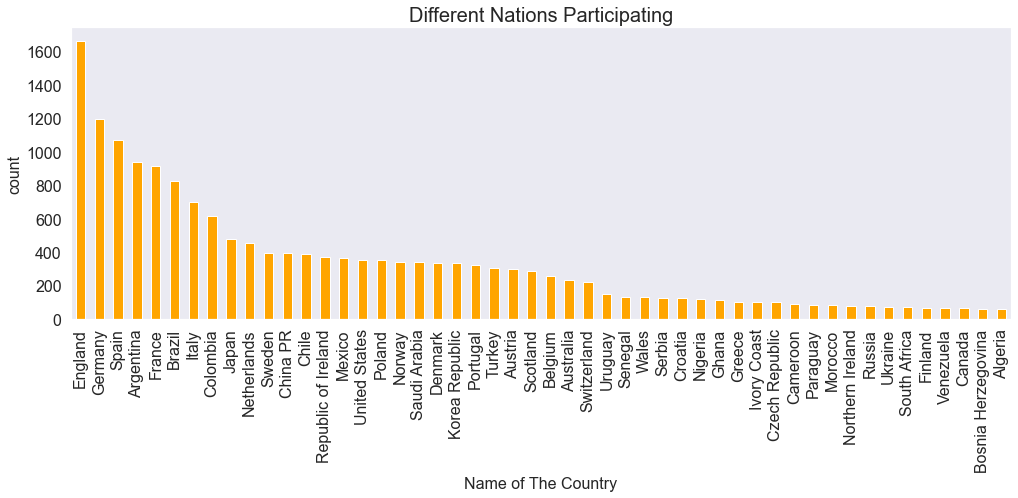

In [31]:
#国別のプレイヤーの数
df['Nationality'].value_counts().head(50).plot.bar(color = 'orange', figsize = (15, 5))
plt.title('Different Nations Participating', fontsize = 20, fontweight = 20)
plt.xlabel('Name of The Country',fontsize = 16)
plt.ylabel('count',fontsize = 16)
plt.tick_params(labelsize = 16)
plt.show()

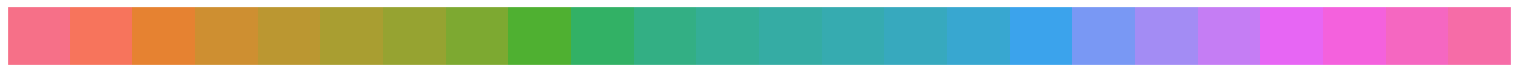

In [10]:
sns.palplot(sns.color_palette("husl",24))

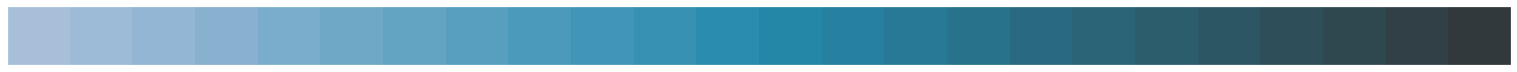

In [11]:
sns.palplot(sns.color_palette("PuBuGn_d",24))

In [13]:
from ipywidgets import interact, FloatSlider
def show_pal0(palette):
    sns.palplot(sns.color_palette(palette, 24))
interact(show_pal0, palette='deep muted pastel bright dark colorblind'.split());

interactive(children=(Dropdown(description='palette', options=('deep', 'muted', 'pastel', 'bright', 'dark', 'c…

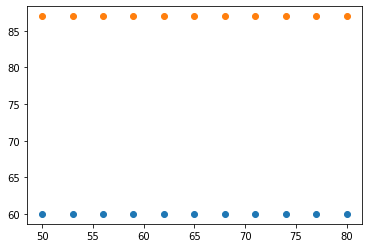

In [33]:
x3 = [50., 53., 56., 59., 62., 65., 68., 71., 74., 77., 80.]
y3 = [ 60.,  60.,  60.,  60.,  60.,  60.,  60.,  60.,  60.,  60.,  60.]

x4 = [50., 53., 56., 59., 62., 65., 68., 71., 74., 77., 80.]
y4 = [ 87.,  87.,  87.,  87.,  87.,  87.,  87.,  87.,  87.,  87.,  87.]

plt.scatter(x3, y3)
plt.scatter(x4, y4)
plt.show()

In [6]:
df_c

,0_Java,0_JavaScript,0_PHP,0_Python,0_Ruby
0,0,0,0,1,0
1,0,0,0,0,1
2,0,0,1,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [7]:
df_d

,0_Python,0_Ruby,0_PHP,0_Java,0_JavaScript
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,0,1


In [10]:
values

array(['Python', 'Ruby', 'PHP', 'Java', 'JavaScript'], dtype=object)